In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [4]:
Nt = 400
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 3.

lambda_ = v*deltat/deltax
mu_ = v*deltat/deltay

print(lambda_,mu_)

0.21428571428571427 0.21428571428571427


In [5]:
def ui(x,y):
    
    return 2*(x-1)*(y-1)

In [6]:
u = np.zeros((Nt,Nx,Ny))

In [7]:
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [8]:
X,Y = np.meshgrid(x,y)

<IPython.core.display.Javascript object>


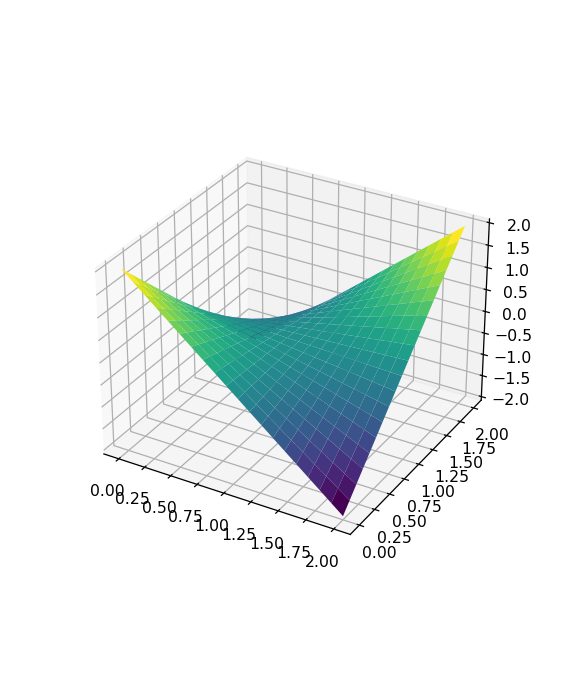

In [10]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u[0,:,:],cmap='viridis')

In [62]:
# Definimos condicion inicial para la cuerda
def ui(r,phi):
    if r == 0.:
        return 0.0
    if r == 1.:
        return 0.0
    else:
        return 1.

In [63]:
def initT():
    u = np.zeros((Nt,Nr,Nphi))
    
    for i in range(Nr):
        for j in range(Nphi):
            u[:,i,j] = ui(r[i],phi[j])
    return u

In [64]:
u = initT()
#print(u)

In [69]:
def GetSolution():
    
    for l in tqdm(range(1,len(u[:,0,0]))):
        for i in range(1,len(r)-1):
            for j in range(len(phi)):
                
                if j == len(phi) -1:
                    b = 1
                else:
                    b = j+1
                
                u[l,i,j] = nu_*(( u[l-1,i+1,j] - 2*u[l-1,i,j] + u[l-1,i-1,j] ) + \
                (dr/r[i])*(u[l-1,i,j]-u[l-1,i-1,j]) + \
                ( (lambda_/r[i])**2 * (u[l-1,i,b] -2*u[l-1,i,j] + u[l-1,i,j-1] ) )) + \
                u[l-1,i,j]
                
                
                #print(l)

In [70]:
GetSolution()

100%|█████████████████████████████████████████████████| 999/999 [00:00<00:00, 1004.30it/s]


<IPython.core.display.Javascript object>


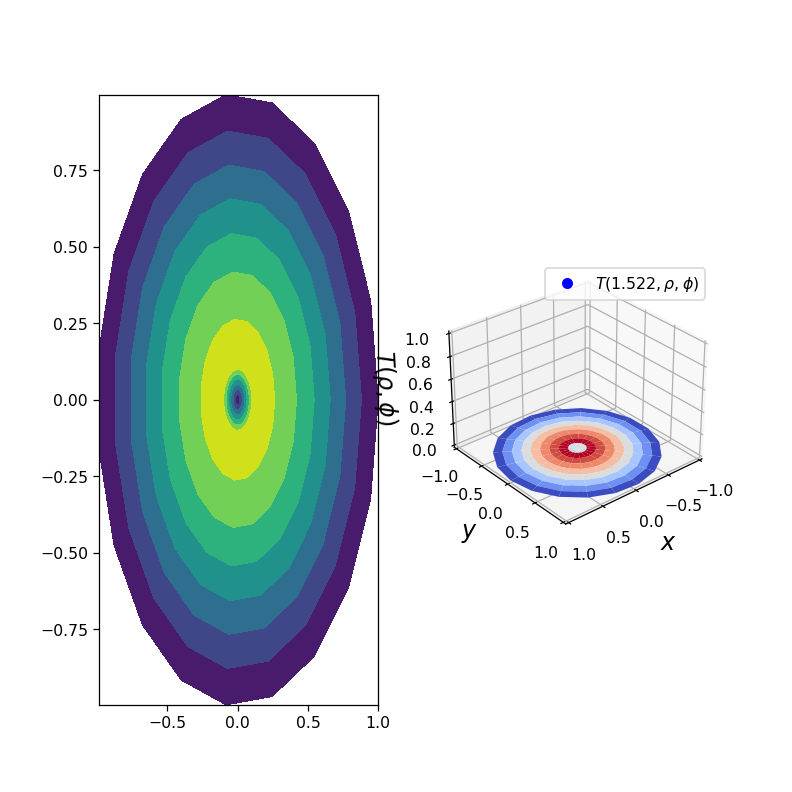

In [71]:
# Zona de animacion
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2, projection = '3d',elev = 30, azim = 50)

R, Phi = np.meshgrid(r, phi)
X, Y = R*np.cos(Phi), R*np.sin(Phi)

def init():

    ax2.set_xlim3d(-1.,1.)
    ax2.set_ylim3d(-1.,1.)
    ax2.set_zlim3d(0.,1.)
    
    ax2.set_xlabel('$x$', fontsize=15)
    ax2.set_ylabel('$y$', fontsize=15)
    ax2.set_zlabel(r'$T(\rho,\phi)$', fontsize=15)
    
    
    #ax.view_init(30,50)
    
def Update(i):

    
    plot = ax1.clear()
    plot = ax2.clear()
    init()
    
    surf = ax1.contourf(X,Y,u[i,:,:].T)
    #cbar = fig.colorbar(surf, ax = ax1)  
    
    
    plot = ax2.plot_surface(X, Y, u[i,:,:].T, cmap=cm.coolwarm) 
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    plot = ax2.legend([fake2Dline], [r'$T(%.3f,\rho,\phi)$' %(t[i])], numpoints=1)
    
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [72]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800 )
#Animation.save( 'Heat2DPolar.mp4', writer=writer )